# DoG
Difference of gaussian outputs the difference of two gaussian values which represents the higher intensity parts of a given matrix.



In [8]:
import sys
!{sys.executable} -m pip install opencv-python


In [1]:
import cv2
import skimage
import skimage.io as io
import skimage.filters as filters
import skimage.color as color
import numpy as np
import scipy.ndimage as nd
import rasterio

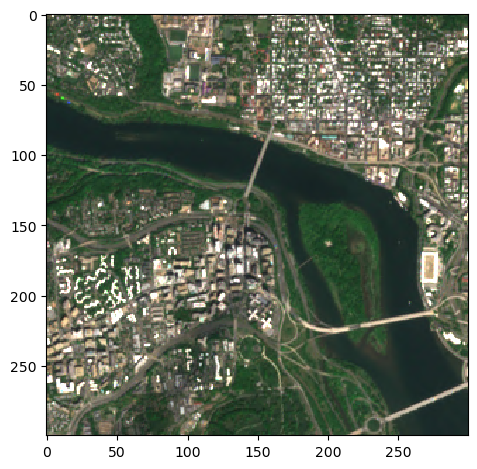

In [2]:
# Demo image
with rasterio.open('demo.jp2') as src:  # jp2 image
    red = src.read(1, masked=True)
    green = src.read(2, masked=True)
    blue = src.read(3, masked=True)

image = np.stack([red, green, blue], axis=-1)  # Restacking channels

io.imshow(image)
io.show()

In [3]:
def DoGFilter(pic, sigma1, sigma2):
    """
    This function finds the difference of two Gaussians.
    
    Parameters:
        pic (ndarray): Input array.
        sigma1 (float): Lower sigma value.
        sigma2 (float): Upper sigma value.
    
    Returns:
        ndarray: The difference of two Gaussian-filtered images.
    """
    b1 = nd.gaussian_filter(pic, sigma1)
    b2 = nd.gaussian_filter(pic, sigma2)
    answ = b1 - b2
    return answ

## How it works
As you can see with this DoG function, it takes the input image and subtracts two filtered versions of it with different sigma values.


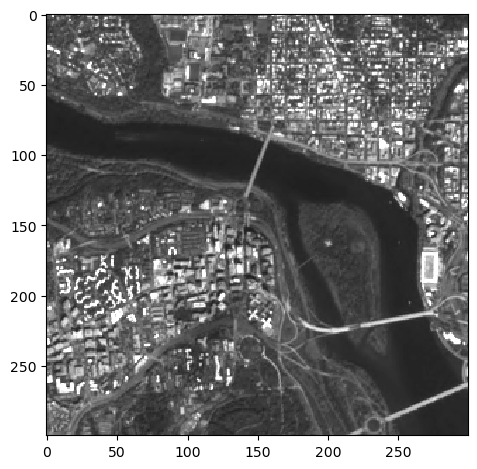

In [4]:
# Grayscale image
gray = color.rgb2gray(image)
io.imshow(gray)
io.show()



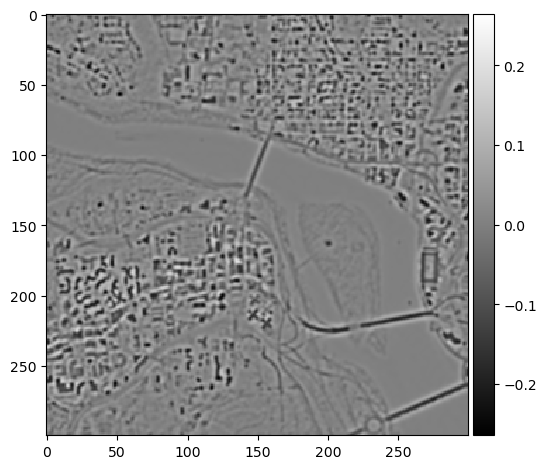

In [5]:
# Using replicated DoG function
dog = DoGFilter(gray, 1, 2)
io.imshow(-dog, cmap='gray')
io.show()

Skimage also comes with a DoG function. 


In [14]:
# Using skimage DoG function
skdog = filters.difference_of_gaussians(gray, 1, 2)

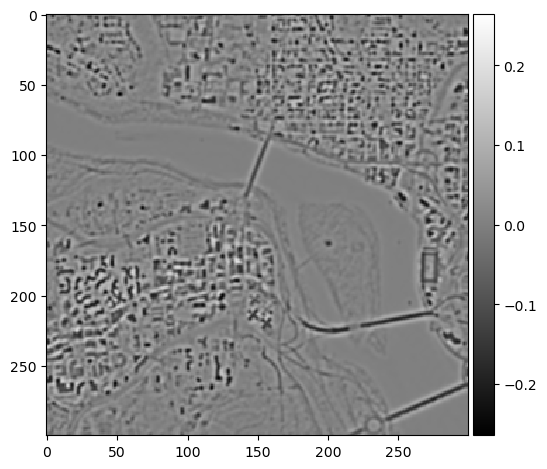

In [15]:
io.imshow(-skdog, cmap = 'gray')
io.show()

Skimage's function works exactly the same but with added functionality. You only need to provide the lower sigma value and there is extensive error checking beyond just the subtraction. 



By subtracting two gaussian blurred images, you are able to isolate the most predominant edges and exclude backround noise and geometry. As a result, DoG is known for its ability to preserve high frequency parts of an image such as edges.



## Additional explanation
Replicating the process in 3D.
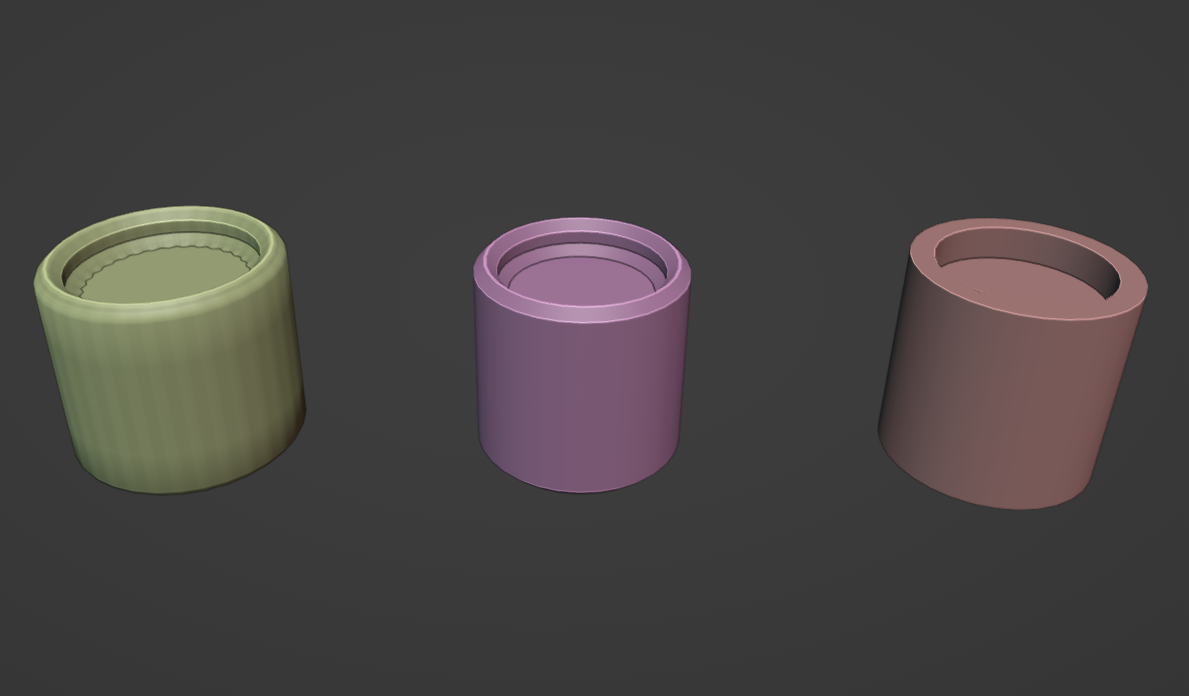


Let the red object be the 3D representation of intensity values of the input image, it would look like an "o" from above with a shaded inside of less intensity than the outer ring.

Let the purple object be the lower sigma gaussian filtered image.

Let the green object be the higher sigma gaussian filtered image - it has the most blurring.
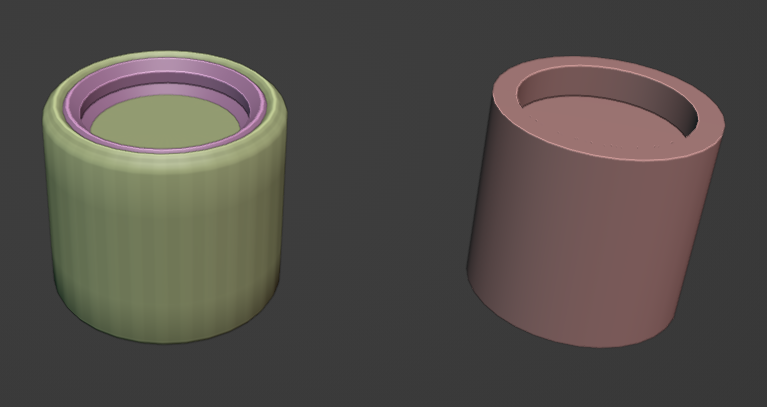

Here, you can see the subtraction of the two gaussian objects.
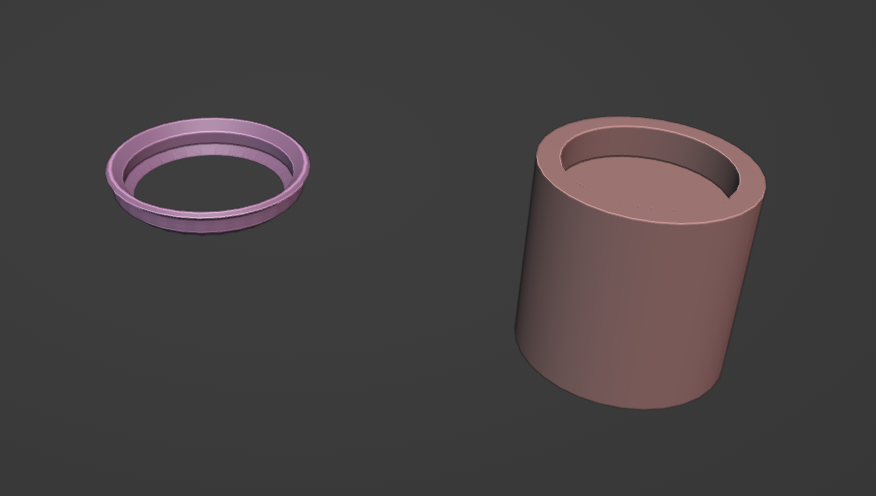

Now, we are left with the difference of the two filtered values which resulted in the edge of the O being preserved but nothing else. 
To further the point, here is the same thing from above.
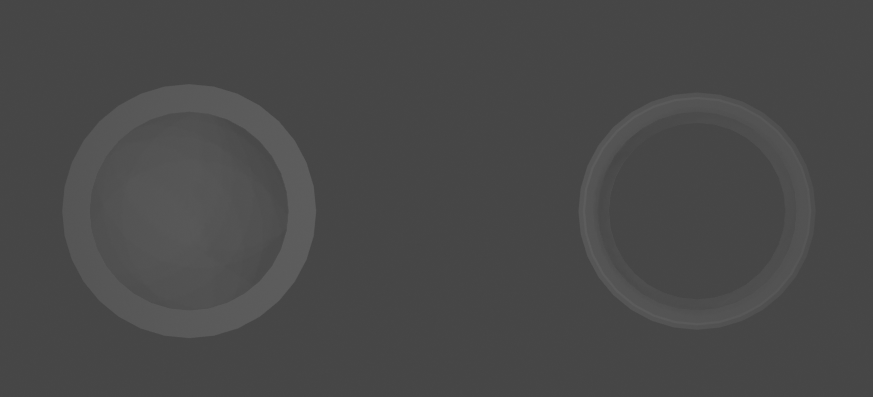

# Reference list 

[1] “Google Colaboratory.” https://colab.research.google.com/drive/1vWAXTgtDvZhhuwoK0LUYXvalIKCTPlhQ?usp=sharing (accessed Jun. 28, 2023).
[2]	S. Van Der Walt et al., “scikit-image: image processing in Python,” PeerJ, vol. 2, p. e453, Jun. 2014, doi: 10.7717/peerj.453.

[3]	“Gaussian Blur.” https://www.w3.org/Talks/2012/0125-HTML-Tehran/Gaussian.xhtml (accessed Jun. 28, 2023).

[4]	“Python OpenCV | cv2.blur() method,” GeeksforGeeks, Nov. 22, 2019. https://www.geeksforgeeks.org/python-opencv-cv2-blur-method/ (accessed Jun. 28, 2023).

